In [453]:
import pandas as pd
import numpy as np

In [454]:
df = pd.read_csv("quikr_car.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [455]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


1. Convert Year, price, kms_driven to int
2. Label encoding fuer_type

In [457]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [458]:
df = df[df['year'].str.isnumeric()]

In [459]:
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [460]:
df.Price = df.Price.str.replace(',', '')
df = df[df.Price.str.isnumeric()]
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [461]:
df.kms_driven.unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [462]:
df.kms_driven = df.kms_driven.str.replace(' kms', '')
df.kms_driven = df.kms_driven.str.replace(',', '')
df = df[df.kms_driven.str.isnumeric()]
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [463]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [464]:
print(df.fuel_type.isna().sum())
print(df.kms_driven.isna().sum())

1
0


In [465]:
df.dropna(subset=['fuel_type'], inplace=True)
df.reset_index(drop = True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [466]:
print(df.fuel_type.isna().sum())

0


In [467]:
fuelDummy = pd.get_dummies(df.fuel_type)
fuelDummy = fuelDummy.astype(int)
df = pd.concat([df, fuelDummy], axis=1)

In [468]:
print(df.head())
print(df.info())

                                     name   company  year   Price kms_driven  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007   80000      45000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006  425000         40   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014  325000      28000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014  575000      36000   
6                               Ford Figo      Ford  2012  175000      41000   

  fuel_type  Diesel  LPG  Petrol  
0    Petrol       0    0       1  
1    Diesel       1    0       0  
3    Petrol       0    0       1  
4    Diesel       1    0       0  
6    Diesel       1    0       0  
<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price

In [469]:
df.year = df.year.astype(int)
df.Price = df.Price.astype(int)
df.kms_driven = df.kms_driven.astype(int)

In [470]:
df.drop(columns = ['fuel_type'], axis = 1, inplace = True)

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   Diesel      816 non-null    int32 
 6   LPG         816 non-null    int32 
 7   Petrol      816 non-null    int32 
dtypes: int32(6), object(2)
memory usage: 38.2+ KB


In [472]:
nameDummy = pd.get_dummies(df.name).astype(int)
companyDummy = pd.get_dummies(df.name).astype(int)

In [473]:
df = pd.concat([df, nameDummy], axis = 1)
df = pd.concat([df, companyDummy], axis = 1)
df.drop(columns = ['name', 'company'], axis = 1, inplace = True)
df.columns

Index(['year', 'Price', 'kms_driven', 'Diesel', 'LPG', 'Petrol',
       'Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       ...
       'Volkswagen Polo', 'Volkswagen Polo Comfortline 1.2L P',
       'Volkswagen Polo Highline Exquisite P',
       'Volkswagen Polo Highline1.2L P', 'Volkswagen Polo Trendline 1.5L D',
       'Volkswagen Vento Comfortline Diesel',
       'Volkswagen Vento Comfortline Petrol',
       'Volkswagen Vento Highline Plus 1.5 Diesel AT',
       'Volkswagen Vento Konekt Diesel Highline', 'Volvo S80 Summum D4'],
      dtype='object', length=932)

## Feature Identification

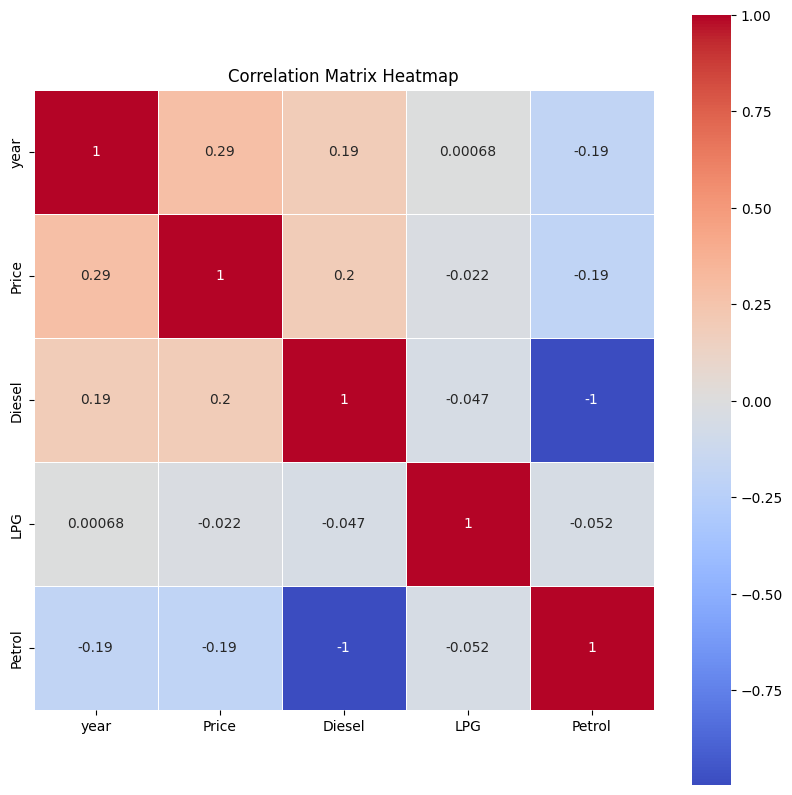

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
columns = ['year', 'Price', 'Diesel', 'LPG', 'Petrol']
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [475]:
X = df.drop(['Price'], axis = 1)
y = df.Price

In [476]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [477]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [478]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)


mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred) * 100

C:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [479]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R2 Score): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Error (MAE): 97889.1076
Mean Squared Error (MSE): 26640732411.1786
Root Mean Squared Error (RMSE): 163219.8898
R-squared Score (R2 Score): 0.7704
Mean Absolute Percentage Error (MAPE): 33.9187%
Accuracy: 77.04%
